In [1]:
import json
import numpy as np
import operator
import pandas as pd
from nltk.stem.porter import *
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
#Music reviews --
from sklearn import datasets, linear_model
import seaborn as sns
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, MiniBatchKMeans
%matplotlib inline

stemmer = SnowballStemmer("english")
#stemmer = PorterStemmer()
vectorizer = TfidfVectorizer(stop_words='english', min_df=4,max_df=0.75)


In [3]:

path='C:/Users/Kai/Desktop/AMAZON music/reviews_Digital_Music_5.json/Digital_Music_5.json'
data={}
#ind=[]
count=0
with open(path) as f:
    for line in f:
        #rand_int= np.random.random()
        #if rand_int>=.5:
         #   ind+=[0]
          #  continue
        #else:
         #   ind+=[1]
        
        count+=1
        x= json.loads(line)
        #print(x)
        rev=x['reviewerID']
        text=x['reviewText']
        
        text = text.replace('&',' ')
        text=text.split()
        stem_text= [stemmer.stem((i)) for i in text]
        text=' '.join(stem_text)
        #print(text)
        
        #stem_text = [stemmer.stem(word) for word in word_tokenize(text)]
        #print(stem_text)
        score=x['overall']
        #Maybe add type later 
        point={'reviewText':text, 'overall':score}
        data[rev]=point
        if count%1000==0:
            print(count)
            #break
    stars=[data[i]['overall'] for i in data]
    ID=[i for i in data]
    
    reviews=[data[i]['reviewText'] for i in data ]
    print(reviews)
    #print(reviews)
    dtm = vectorizer.fit_transform(reviews)
    dtm = dtm.todense()
    cent_dtm= dtm - np.mean(dtm, axis=0)
    print(type(dtm))
    print(dtm.size)
    panda = pd.DataFrame(cent_dtm, index=ID,columns =
vectorizer.get_feature_names() )
    #panda["ID"]=ID
    panda['Score']=stars
    #panda.to_csv("Stemmed.csv", index=True)
        
    


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
["rather a surpris i didn't know what i was getting. this is truli one of the greatest music endeabor and collabor of all time. great song and singing.", "bizkit has gone from be the best band (in the three dollar bill ya'll days) to a band that i like to listen to, but not my favorite. this cd is better than their second one and worth having. i would buy it if you like their first one caus the style is similar. they do swear a lot and all that stuff. they have sold out a lot too. those are the reason a lot of pewopl are against them. but they aren't as bad as eminem in the first fault, or the boy band on the second. 

In [4]:
panda

00       000        01        02        03      0304  \
AELBITXGN5HXL  -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
AWQO371QER642  -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A6DSDTFL9O4HB  -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A1OEKP3EWO5Q99 -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A25LREZ1IMRVCU -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A2NULDU4VTY38H -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A1VABWDOUQLULZ -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A3FILOE6VDORL5 -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A1KFWSYZIOBI3Y -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A2W0CD4OPKF4ID -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A21AMFQK5SGWTC -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A2PCNX59G2GLIM -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A15PG37TAILLHG -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
AFMWLT45X9H4R  -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A233KZTTRORQRF -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A24FLISHDZNZ2Q -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
AKSHBJ6MNFRBV  -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A2IZTYGQSYXHQH -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A3S175V6UMWDSU -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A2EKQ4DBGOBVKO -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A3GHQ2D2Q1DGQC -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A6DM1B2370X1Y  -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A11ZPFSJAY25AZ -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A1OM81QOAOXOZX -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A2ORFK7XV8CWQ2 -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
AP9PU72HEQ87J  -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A3LICQNQLHPFTE -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A2LSRBVD2MK3PL -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A7BMT8NKAZK6S  -0.00031 -0.000687 -0.000138 -0.000159  0.052546 -0.000107   
A3OI7Y4WK1Y51U -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
...                 ...       ...       ...       ...       ...       ...   
A14I0X9ZNK9D83 -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A3K5MD1NV1T2KI -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
AHCVWPLA1O4X8  -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A2774M0U939V58 -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A3ZP2A2SWNRCB  -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A22HLF752R5R2A -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
AWHMBKCAMA8KG  -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A31G6GDQ5A6VZC -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
ATNZ6ZION5HI1  -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A3ASUTW2OG0P6K -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A1MRL66BXLXD1A -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A35NWEI1L3EJ1Z -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A24675LFHITRDM -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A66GZ501LMBQV  -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
ASD8JA3IBRIKJ  -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A19HIVCY0C6DQ3 -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
AIXN5G2G6V9B9  -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A6AAUT0BISP63  -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A2MMHGHYDI3USP -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A14NP28ZWMYIY9 -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A2ZUX1WWXZ3DHF -0

In [2]:
#panda.to_csv("Stemmed.csv", index=True)
#len(panda)
panda=pd.read_csv("Stemmed.csv", index_col=0)

In [3]:
panda

00       000        01        02        03      0304  \
AELBITXGN5HXL  -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
AWQO371QER642  -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A6DSDTFL9O4HB  -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A1OEKP3EWO5Q99 -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A25LREZ1IMRVCU -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A2NULDU4VTY38H -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A1VABWDOUQLULZ -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A3FILOE6VDORL5 -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A1KFWSYZIOBI3Y -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A2W0CD4OPKF4ID -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A21AMFQK5SGWTC -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A2PCNX59G2GLIM -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A15PG37TAILLHG -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
AFMWLT45X9H4R  -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A233KZTTRORQRF -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A24FLISHDZNZ2Q -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
AKSHBJ6MNFRBV  -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A2IZTYGQSYXHQH -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A3S175V6UMWDSU -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A2EKQ4DBGOBVKO -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A3GHQ2D2Q1DGQC -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A6DM1B2370X1Y  -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A11ZPFSJAY25AZ -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A1OM81QOAOXOZX -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A2ORFK7XV8CWQ2 -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
AP9PU72HEQ87J  -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A3LICQNQLHPFTE -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A2LSRBVD2MK3PL -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A7BMT8NKAZK6S  -0.00031 -0.000687 -0.000138 -0.000159  0.052546 -0.000107   
A3OI7Y4WK1Y51U -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
...                 ...       ...       ...       ...       ...       ...   
A14I0X9ZNK9D83 -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A3K5MD1NV1T2KI -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
AHCVWPLA1O4X8  -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A2774M0U939V58 -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A3ZP2A2SWNRCB  -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A22HLF752R5R2A -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
AWHMBKCAMA8KG  -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A31G6GDQ5A6VZC -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
ATNZ6ZION5HI1  -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A3ASUTW2OG0P6K -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A1MRL66BXLXD1A -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A35NWEI1L3EJ1Z -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A24675LFHITRDM -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A66GZ501LMBQV  -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
ASD8JA3IBRIKJ  -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A19HIVCY0C6DQ3 -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
AIXN5G2G6V9B9  -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A6AAUT0BISP63  -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A2MMHGHYDI3USP -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A14NP28ZWMYIY9 -0.00031 -0.000687 -0.000138 -0.000159 -0.000284 -0.000107   
A2ZUX1WWXZ3DHF -0

In [5]:
words=vectorizer.get_feature_names()
print(words)

['00', '000', '01', '02', '03', '0304', '04', '05', '06', '07', '08', '09', '10', '100', '1000', '101', '1010', '1011', '1012', '1013', '1014', '1015', '1016', '102', '103', '104', '105', '106', '107', '108', '109', '10overal', '10the', '10x', '11', '112', '11th', '12', '13', '14', '15', '16', '17', '18', '180', '182', '19', '1960', '1960s', '1961', '1962', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1970s', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1980s', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1990s', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '1st', '20', '200', '2000', '2000s', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '20th', '21', '2112', '21st', '22', '23', '24', '25', '26', '27', '28', '29', '2nd', '2pac', '30', '300', '3000', '30th', '31', '32', '33', '34', '35', '36', '37', '38', '39', 

In [4]:
import math
panda_train=panda.sample(n=math.floor(len(panda) * .5))
#panda_train
#cols=panda_test.as_matrix()
#cols

#print(words==test_words)
t_panda=panda.transpose()
#t_panda


In [5]:
panda_train.columns[:-1]

u,s,vt= np.linalg.svd(panda_train[panda_train.columns[:-1]]) #Singular value decomp

In [6]:
#panda_train

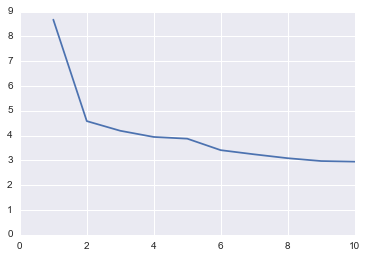

In [7]:
plt.xlim([0,10])
plt.plot(range(1,len(s)+1),s) #apparently the effective rank is 2 ...

In [8]:
k=4
vectorsk=u[:,:k] @ np.diag(s[:k])
vectorsk
m=-1
for i in range(len(vectorsk)):
    for j in range(len(vectorsk[0])):
        if vectorsk[i][j]>m:
            m=vectorsk[i][j]
print(m)
print(vectorsk)

0.939152411274
[[-0.10355566 -0.03207476  0.07506837 -0.0120445 ]
 [ 0.04649016 -0.01988734  0.03582102  0.04513039]
 [ 0.04264394  0.01925292 -0.10360898 -0.03959478]
 ..., 
 [ 0.04524013  0.00650041 -0.00740842 -0.04077253]
 [ 0.05059875 -0.02504549  0.06165565  0.01026678]
 [ 0.05195525 -0.02834908 -0.08375388 -0.13501881]]


In [9]:
Y= panda_train["Score"]


In [10]:
X= vectorsk
#X= panda_train[panda_train.columns[:-1]]
#print(cols)
#print(X)

In [11]:
clf= svm.SVC(decision_function_shape= "ovo")
clf.fit(X, Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
train_tran= panda_train.transpose()
revs=[]
for i in t_panda:
    if i not in train_tran:
        revs+=[i] 
#print(revs)

p_test=t_panda[revs]
t_p_test=p_test.transpose()
cols=t_p_test.columns[:-1]
u1,s1,vt1= np.linalg.svd(t_p_test[t_p_test.columns[:-1]])

In [13]:
k1=4
vectorsk1=u1[:,:k1] @ np.diag(s1[:k1])
vectorsk1

array([[-0.0423239 ,  0.0102801 , -0.0437422 ,  0.01013995],
       [-0.05429177,  0.00949584, -0.06356068, -0.06717113],
       [-0.05818904, -0.12321577,  0.08241223, -0.02935018],
       ..., 
       [-0.04309584,  0.04880169, -0.06277796,  0.07758823],
       [-0.03706395,  0.03870451, -0.04841128,  0.06224252],
       [-0.0529561 , -0.02901791,  0.02381596,  0.02163573]])

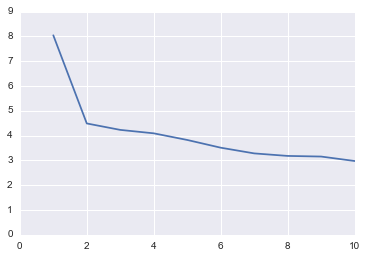

In [14]:
plt.xlim([0,10])
plt.plot(range(1,len(s1)+1),s1) #apparently the effective rank is 2 ...

In [15]:
X=sm.add_constant(X)
ols_model = sm.OLS(Y, X)  #linear regression on Test set. 
ols_results = ols_model.fit()
ols_results.summary()
#ypred = ols_results.predict(vectorsk1)

#Z=clf.predict(vectorsk1)
#Z
#for i in Z:
    #print(i)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     30.39
Date:                Sat, 19 Nov 2016   Prob (F-statistic):           8.74e-25
Time:                        16:24:49   Log-Likelihood:                -4365.3
No. Observations:                2770   AIC:                             8741.
Df Residuals:                    2765   BIC:                             8770.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          4.0929      0.022    183.896      0.000         4.049     4.137
x1            -0.0786      0.135     -0.582      0.560        -0.343     0.186
x2             0.1939      0.255      0.759      0.448        -0.307     0.695
x3             0.3438      0.279      1.232      0.218        -0.204     0.891
x4            -3.2400      0.297    -10.914      0.000        -3.822    -2.658
==============================================================================
Omnibus:                      423.373   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              637.887
Skew:                          -1.155   Prob(JB):                    3.05e-139
Kurtosis:                       3.440   Cond. No.                         13.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
ols_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     30.39
Date:                Sat, 19 Nov 2016   Prob (F-statistic):           8.74e-25
Time:                        16:24:49   Log-Likelihood:                -4365.3
No. Observations:                2770   AIC:                             8741.
Df Residuals:                    2765   BIC:                             8770.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          4.0929      0.022    183.896      0.000         4.049     4.137
x1            -0.0786      0.135     -0.582      0.560        -0.343     0.186
x2             0.1939      0.255      0.759      0.448        -0.307     0.695
x3             0.3438      0.279      1.232      0.218        -0.204     0.891
x4            -3.2400      0.297    -10.914      0.000        -3.822    -2.658
==============================================================================
Omnibus:                      423.373   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              637.887
Skew:                          -1.155   Prob(JB):                    3.05e-139
Kurtosis:                       3.440   Cond. No.                         13.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
for i in ypred:
    print(i)

NameError: name 'ypred' is not defined

In [18]:
test_panda= t_panda[revs]
test_panda
t_test_panda=test_panda.transpose()
#t_test_panda

In [19]:
ypred=clf.predict(vectorsk1)

In [ ]:
ypred #all 5s!
for i in ypred:
    if i!=5:
        print(i)


In [32]:
#Kmeans 

kmeans = KMeans(n_clusters=5, random_state=0).fit(vectorsk)
Z1=kmeans.labels_
Z=panda_train[panda_train.columns[-1]]
count=0
d={0:[],1:[],2:[],3:[], 4:[]}
for i in Z:
    act=i
    gues=Z1[count]
    d[gues]+=[act]
    count+=1
d

from collections import Counter

for i in d:
        count=Counter(d[i])
        V=count.most_common()
        print(i, V)
        for j in V:
            print(j[0)
            print(j[0/(400+209+100+48+23))
            break
        #print(i, )
        
        

SyntaxError: invalid syntax (<ipython-input-32-61c92b98bb9a>, line 22)

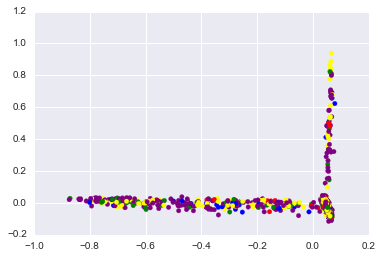

In [25]:
colors = ['red','blue','green','yellow','purple']
X_v=[i[0] for i in vectorsk]
Y_v=[i[1] for i in vectorsk]
#print(X_v, Y_v)
c=[colors[int(i)-1] for i in Y]
c1=[colors[int(i)-1] for i in Z1]
plt.scatter(X_v,Y_v,color=c)

In [37]:

new_col=[]
for i in Y:
    if i>2.5:
        new_col+=[1]
    else:
        new_col+=[0]
panda_train["Good"]=new_col
#panda_train

In [48]:
clf = svm.SVC(kernel='poly')
clf.fit(vectorsk, new_col)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [49]:
ypred=clf.predict(vectorsk1)
ypred
for i in ypred:
    print(i)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [58]:
import optunity
import optunity.metrics
import sklearn.svm

# score function: twice iterated 10-fold cross-validated accuracy
@optunity.cross_validated(x=vectorsk, y=new_col, num_folds=10, num_iter=2)
def svm_auc(x_train, y_train, x_test, y_test, logC, logGamma):
    model = sklearn.svm.SVC(C=10 ** logC, gamma=10 ** logGamma).fit(x_train, y_train)
    decision_values = model.decision_function(x_test)
    return optunity.metrics.roc_auc(y_test, decision_values)

# perform tuning
hps, _, _ = optunity.maximize(svm_auc, num_evals=200, logC=[-5, 2], logGamma=[-5, 1])

# train model on the full training set with tuned hyperparameters
optimal_model = sklearn.svm.SVC(C=10 ** hps['logC'], gamma=10 ** hps['logGamma']).fit(vectorsk, new_col)

In [59]:
ypred=optimal_model.predict(vectorsk1)
for i in ypred:
    print(i)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
